In [11]:
annotator = "Name"

In [12]:
import matplotlib.pyplot as plt
import json
from skimage import draw
import numpy as np
from PIL import Image
import os

In [101]:
def poly2mask(polygons, img):
    mask = np.zeros(img.shape, dtype=bool)
    for polys in polygons:
        #print(polys)
        for poly in polys:
            if len(poly) == 1:
                poly = np.array(poly[0])
            else:
                poly = np.array(poly)
            vertex_row_coords = poly[:, 1]
            vertex_col_coords = poly[:, 0]
            fill_row_coords, fill_col_coords = draw.polygon(vertex_row_coords, vertex_col_coords, img.shape)    
            mask[fill_row_coords, fill_col_coords] = True

    return mask

In [102]:
def json_to_mask(img_path, json_path, name):
    img = plt.imread(img_path)
    with open(json_path) as j_file:
        ann = json.load(j_file)
    polygons = []
    for an in ann:
        poly = an["geometry"]["coordinates"]
        polygons.append(np.array(poly))
    mask = poly2mask(polygons, img)
    plt.imshow(mask)
    plt.show()
    mask = Image.fromarray(mask)
    mask.save(annotator+"_masks/"+name+".png")

0001.tif


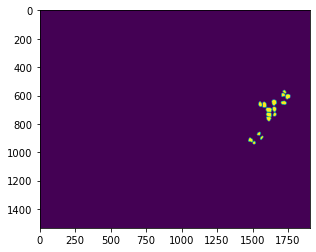

0002.tif


<ipython-input-102-b45aebf41bf0>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  polygons.append(np.array(poly))


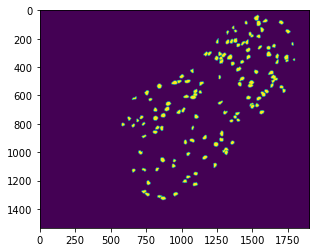

0003.tif


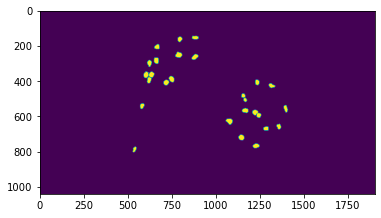

0004.tif


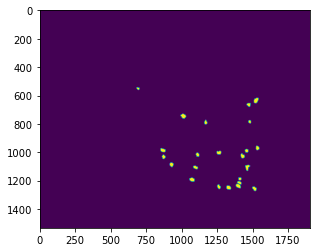

0005.tif


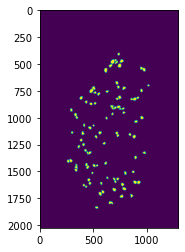

0006.tif


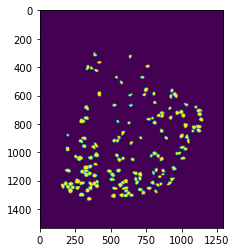

0007.tif


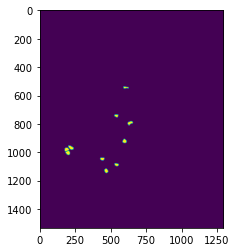

0008.tif


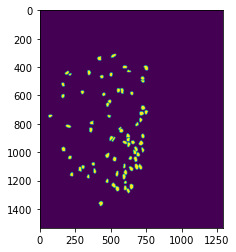

0009.tif


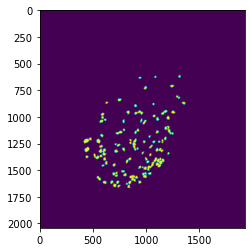

0010.tif


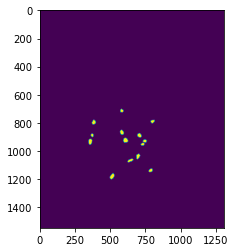

0011.tif


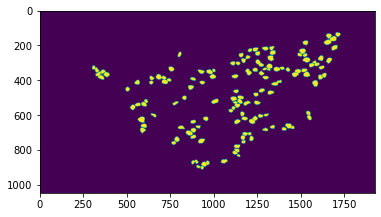

0012.tif


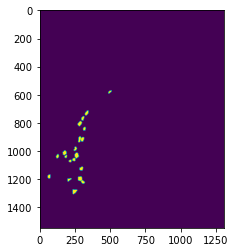

0013.tif


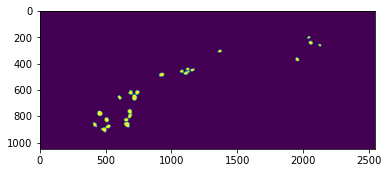

0014.tif


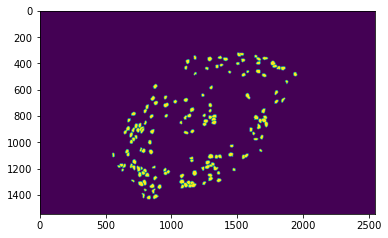

0015.tif


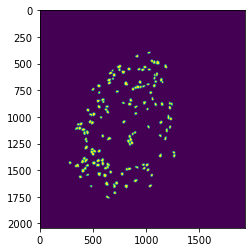

In [103]:
for img_name, json_name in zip(os.listdir('images'), os.listdir(annotator+'_json')):
    img_path = os.path.join('images',img_name)
    json_path = os.path.join(annotator+'_json',json_name)
    name = img_name[:-4]
    print(img_name)
    json_to_mask(img_path, json_path, name)